In [1]:
import numpy as np
import pandas as pd
import recombination as rb
import timeit

# Please, to run the experiment donwload the following dataset and put it in the /Dataset folder:
# 	- 3D_spatial_network.txt - 
#       https://archive.ics.uci.edu/ml/machine-learning-databases/00246/3D_spatial_network.txt

filename = "Datasets/3D_spatial_network.txt"
df = pd.read_csv(filename, sep=',', usecols=[1,2,3])
df = df.dropna()

print(list(df.columns.values) )

['9.3498486', '56.7408757', '17.0527715677876']


In [2]:
df.columns = ['Longitude', 'Latitude', 'Altitude']
print(list(df.columns.values))

df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Altitude'] = pd.to_numeric(df['Altitude'], errors='coerce')

df = df.dropna()

print(df.shape)
print(df.dtypes)

df.head()

['Longitude', 'Latitude', 'Altitude']
(434873, 3)
Longitude    float64
Latitude     float64
Altitude     float64
dtype: object


,Longitude,Latitude,Altitude
0,9.350188,56.740679,17.614840
1,9.350549,56.740544,18.083536
2,9.350806,56.740484,18.279465
3,9.351053,56.740486,18.422974
4,9.351475,56.740502,19.124889


In [3]:
x = df[['Longitude','Latitude']]
x = x.to_numpy()
y = df['Altitude']
y = y.to_numpy()
n = x.shape[1]

In [4]:
print(x.shape)
X = np.append(x,y[np.newaxis].T,1)

xy_sq = rb.tens_sq(X)

print(xy_sq.shape)
print(xy_sq[:,n+1:].shape)

N, d = xy_sq[:,n+1:].shape

(434873, 2)
(434873, 9)
(434873, 6)


In [5]:
mean_t = 0.

time_rand = []
iterations_rand = []

min_t = np.inf
max_t = 0.
sample = 1000

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_Mor_reset(
                    xy_sq[:,n+1:]-np.mean(xy_sq[:,n+1:],0), 400)

    time_rand.append((timeit.default_timer()-tic)*1000)
    iterations_rand.append(iterations)
    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_rand[-1]
    print("sample = ", i)
    print("time = ", time_rand[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_rand)
max_t = max(time_rand)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std = ", np.std(time_rand))
print("---------------------------------------")

sample =  0
time =  36.33506899999972 ms
mean time =  36.33506899999972 ms
sample =  1
time =  26.383444000000367 ms
mean time =  31.359256500000043 ms
sample =  2
time =  24.536091999999954 ms
mean time =  29.084868333333347 ms
sample =  3
time =  89.20942700000012 ms
mean time =  44.116008000000036 ms
sample =  4
time =  27.0732709999999 ms
mean time =  40.707460600000005 ms
sample =  5
time =  25.166943999999525 ms
mean time =  38.117374499999926 ms


/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:376: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)
/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:401: RuntimeWarning: invalid value encountered in greater
  tmp_2 = np.transpose(AX>0)


sample =  6
time =  147.0657649999998 ms
mean time =  53.6814302857142 ms
sample =  7
time =  70.28535099999988 ms
mean time =  55.75692037499991 ms
sample =  8
time =  65.46026599999965 ms
mean time =  56.83506988888877 ms
sample =  9
time =  24.027721999999585 ms
mean time =  53.55433509999985 ms
sample =  10
time =  66.4036389999998 ms
mean time =  54.722453636363475 ms
sample =  11
time =  93.62567300000002 ms
mean time =  57.96438858333318 ms
sample =  12
time =  24.083834999999887 ms
mean time =  55.35819215384601 ms
sample =  13
time =  68.08415099999988 ms
mean time =  56.26718921428557 ms
sample =  14
time =  70.2206030000001 ms
mean time =  57.19741679999988 ms
sample =  15
time =  23.97169500000018 ms
mean time =  55.120809187499894 ms
sample =  16
time =  65.01629999999992 ms
mean time =  55.70289688235283 ms
sample =  17
time =  113.3978830000002 ms
mean time =  58.9081738888888 ms
sample =  18
time =  26.072333000000114 ms
mean time =  57.17997173684202 ms
sample =  19
ti

In [6]:
mean_t = 0.
sample = 100
time_MT = []

min_t = np.inf
max_t = 0.

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    x_cp = np.copy(xy_sq[:,n+1:])
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.Tchernychova_Lyons(
                    x_cp)
    time_MT.append((timeit.default_timer()-tic)*1000)

    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_MT[-1]
    print("sample = ", i)
    print("time = ", time_MT[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_MT)
max_t = max(time_MT)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std FC = ", np.std(time_MT))
print("---------------------------------------")

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:882: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


sample =  0
time =  102.40024000000858 ms
mean time =  102.40024000000858 ms
sample =  1
time =  80.76957000000107 ms
mean time =  91.58490500000482 ms
sample =  2
time =  91.58801899999958 ms
mean time =  91.58594300000307 ms
sample =  3
time =  89.42803200000071 ms
mean time =  91.04646525000248 ms
sample =  4
time =  82.88826499999402 ms
mean time =  89.41482520000079 ms
sample =  5
time =  83.23619000000804 ms
mean time =  88.38505266666867 ms
sample =  6
time =  83.23271300000101 ms
mean time =  87.649004142859 ms
sample =  7
time =  82.1789310000014 ms
mean time =  86.9652450000018 ms
sample =  8
time =  84.99446099999375 ms
mean time =  86.74626900000091 ms
sample =  9
time =  83.02477399999475 ms
mean time =  86.37411950000029 ms
sample =  10
time =  83.16319700000463 ms
mean time =  86.08221745454614 ms
sample =  11
time =  82.66650299999867 ms
mean time =  85.79757458333386 ms
sample =  12
time =  84.25171100000739 ms
mean time =  85.67866200000104 ms
sample =  13
time =  84.

In [7]:
from Maalouf_Jubran_Feldman import Fast_Caratheodory

time_FC = []
mean_t = 0.

for i in range(100):
    tic = timeit.default_timer()
    Fast_Caratheodory(xy_sq[:,n+1:],np.ones(N),d+1)
    time_FC.append((timeit.default_timer()-tic)*1000)
    mean_t += time_FC[-1]
    print("sample = ", i)
    print("time = ", time_FC[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")


print("---------------------------------------")
print("max FC = ", np.max(time_FC), " ms")
print("min FC = ", np.min(time_FC), " ms")   
print("mean FC = ", np.mean(time_FC), " ms")
print("std FC = ", np.std(time_FC))
print("---------------------------------------")

sample =  0
time =  125.4611170000004 ms
mean time =  125.4611170000004 ms
sample =  1
time =  125.6034059999962 ms
mean time =  125.5322614999983 ms
sample =  2
time =  134.67985399999804 ms
mean time =  128.5814589999982 ms
sample =  3
time =  124.9593539999978 ms
mean time =  127.67593274999811 ms
sample =  4
time =  130.25603500000216 ms
mean time =  128.19195319999892 ms
sample =  5
time =  119.66097200000547 ms
mean time =  126.77012300000001 ms
sample =  6
time =  123.25889099999188 ms
mean time =  126.26851842857027 ms
sample =  7
time =  114.86414599998795 ms
mean time =  124.84297187499749 ms
sample =  8
time =  117.7107520000078 ms
mean time =  124.05050299999863 ms
sample =  9
time =  117.45620500001053 ms
mean time =  123.3910731999998 ms
sample =  10
time =  117.6058989999973 ms
mean time =  122.86514827272686 ms
sample =  11
time =  114.96371399999816 ms
mean time =  122.20669541666614 ms
sample =  12
time =  116.28008899999998 ms
mean time =  121.75080261538412 ms
sampl

In [8]:
mean_t = 0.
sample = 1000

time_log = np.zeros(sample)

min_t = 0.
max_t = 0.

COV = np.matmul(x[:,:].T,x[:,:])/N

for i in range(sample):
    x_cp = np.copy(xy_sq[:,n+1:])

    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, _, _ = rb.recomb_log(x_cp)
    time_log[i] = (timeit.default_timer()-tic)*1000

    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1

    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED

    mean_t += time_log[i]
    print("sample = ", i)
    print("time = ", time_log[i], "ms")
    print("mean time = ", mean_t/(i+1), "ms")
    
mean_t = np.mean(time_log)
min_t = np.min(time_log)
max_t = np.max(time_log)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

sample =  0
time =  43.16882599999872 ms
mean time =  43.16882599999872 ms
sample =  1
time =  39.58155399999441 ms
mean time =  41.375189999996564 ms
sample =  2
time =  33.24139900000489 ms
mean time =  38.663926333332675 ms
sample =  3
time =  34.213815999990516 ms
mean time =  37.551398749997134 ms
sample =  4
time =  33.44581300000016 ms
mean time =  36.73028159999774 ms
sample =  5
time =  37.583113000010826 ms
mean time =  36.872420166666586 ms


/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:376: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)
/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:401: RuntimeWarning: invalid value encountered in greater
  tmp_2 = np.transpose(AX>0)


sample =  6
time =  38.33061999999643 ms
mean time =  37.08073442857085 ms
sample =  7
time =  40.13561899999729 ms
mean time =  37.462594999999155 ms
sample =  8
time =  36.002891999999065 ms
mean time =  37.30040577777692 ms
sample =  9
time =  38.64203700000246 ms
mean time =  37.434568899999476 ms
sample =  10
time =  36.92757999999685 ms
mean time =  37.388478999999236 ms
sample =  11
time =  37.01669299999821 ms
mean time =  37.35749683333248 ms
sample =  12
time =  36.5106299999951 ms
mean time =  37.29235323076807 ms
sample =  13
time =  37.434801000003404 ms
mean time =  37.30252807142774 ms
sample =  14
time =  36.74229400000684 ms
mean time =  37.265179133333014 ms
sample =  15
time =  40.0349860000091 ms
mean time =  37.43829206250027 ms
sample =  16
time =  39.010391999994454 ms
mean time =  37.53076852941169 ms
sample =  17
time =  38.423832999995966 ms
mean time =  37.580383222221926 ms
sample =  18
time =  35.86271500000748 ms
mean time =  37.48997963157906 ms
sample = 

/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


sample =  60
time =  37.33435499999871 ms
mean time =  37.836761704917734 ms
sample =  61
time =  36.99622999999974 ms
mean time =  37.823204741935186 ms
sample =  62
time =  36.746362000002364 ms
mean time =  37.80611199999975 ms
sample =  63
time =  36.795182000005866 ms
mean time =  37.790316218749844 ms
sample =  64
time =  34.819934000012154 ms
mean time =  37.74461803076927 ms
sample =  65
time =  36.85112899999865 ms
mean time =  37.73108031818184 ms
sample =  66
time =  38.47233300000141 ms
mean time =  37.74214379104482 ms
sample =  67
time =  39.129789000000414 ms
mean time =  37.76255033823534 ms
sample =  68
time =  38.53756399999497 ms
mean time =  37.77378242028983 ms
sample =  69
time =  36.676017999994315 ms
mean time =  37.75810007142846 ms
sample =  70
time =  37.27832100000228 ms
mean time =  37.75134261971823 ms
sample =  71
time =  40.18248100000221 ms
mean time =  37.7851084305555 ms
sample =  72
time =  36.36935000000108 ms
mean time =  37.76571447945202 ms
sampl

In [9]:
time_rand = np.array(time_rand)
iterations_rand = np.array(iterations_rand)
time_FC = np.array(time_FC)
time_log = np.array(time_log)
time_MT = np.array(time_MT)

np.set_printoptions(precision=1)

print("Probability to be faster = ", 
            np.sum(np.array(time_rand)<np.mean(time_FC))/sample*100, "%")
print("Probability to be 4x faster = ", 
            np.sum(np.array(time_rand)<np.mean(time_FC)/4)/sample*100, "%")

print("Standard deviation = ", np.std(time_rand))

print("The expected time of the log-random is ", np.mean(time_log), "ms")

print("Standard deviation of the log-random is  = ", np.std(time_log))

np.set_printoptions(precision=1)
print('''Some statistics for the randomized algorithm are: 
      average running time = ''', np.round(np.mean(time_rand),1),  
      "ms, min = " , np.round(np.min(time_rand),1), "ms, max = ", np.round(np.max(time_rand),1),
      "ms, std ", np.round(np.std(time_rand),1), 
      "ms. Using the log-random strategy they are: average running time = ", np.round(np.mean(time_log),1),
      "ms, min = ", np.round(np.min(time_log),1), "ms, max = ", np.round(np.max(time_log),1),
      ", std = ", np.round(np.std(time_log),1), "ms.",
      " Average runnig times of determinsitic: TL = ", np.round(np.mean(time_MT),1),
      "ms, MJF = ", np.round(np.mean(time_FC),1),"ms.")

Probability to be faster =  88.1 %
Probability to be 4x faster =  53.2 %
Standard deviation =  57.14290192520298
The expected time of the log-random is  37.81433038600021 ms
Standard deviation of the log-random is  =  1.8713572180105633
Some statistics for the randomized algorithm are: 
      average running time =  61.7 ms, min =  22.4 ms, max =  453.6 ms, std  57.1 ms. Using the log-random strategy they are: average running time =  37.8 ms, min =  33.2 ms, max =  56.0 , std =  1.9 ms.  Average runnig times of determinsitic: TL =  84.0 ms, MJF =  125.5 ms.


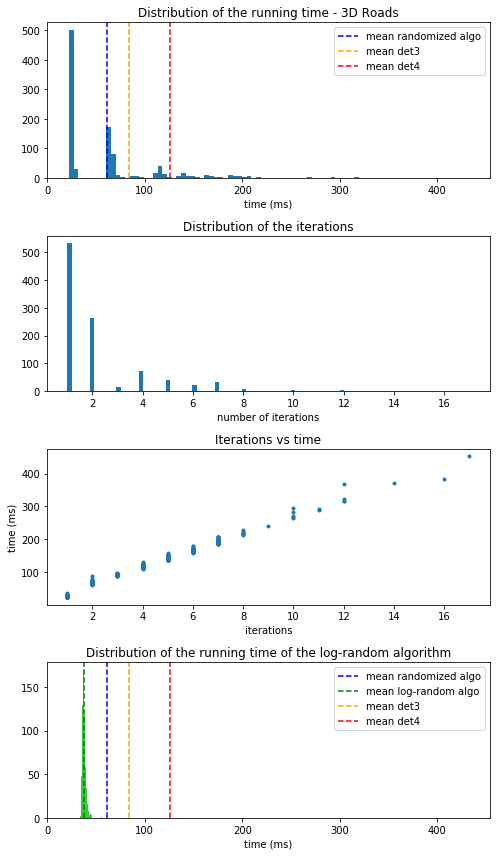

In [21]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4,1,figsize=(7,12))

################################################
plt.subplot(4, 1, 1)

plt.hist(time_rand, bins=int(90))
plt.axvline(np.mean(time_rand), 0, max(time_rand), linestyle='dashed', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_MT), 0, max(time_MT), linestyle='dashed', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), 0, max(time_rand), linestyle='dashed', color="red", label="mean det4")

plt.xlim((0, max(time_rand)))

plt.legend()
plt.title('Distribution of the running time - 3D Roads')
plt.xlabel('time (ms)')

################################################
plt.subplot(4, 1, 2)

plt.hist(iterations_rand, bins=int(90))
plt.title('Distribution of the iterations')
plt.xlabel('number of iterations')
plt.xscale('linear')

################################################
plt.subplot(4, 1, 3)

plt.plot(iterations_rand,time_rand, '.')
plt.xlabel('iterations')
plt.ylabel('time (ms)')
plt.title('Iterations vs time')

################################################
plt.subplot(4, 1, 4)

plt.hist(time_log, bins=int(40),color='limegreen')
plt.axvline(np.mean(time_rand), linestyle='dashed', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_log), linestyle='dashed', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), linestyle='dashed', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), linestyle='dashed', color="red", label="mean det4")
plt.xlim((0, max(time_rand)))

plt.legend()
plt.title('Distribution of the running time of the log-random algorithm')
plt.xlabel('time (ms)')

fig.tight_layout()
# plt.savefig('Distrib_running_time_3DRoads.pdf')#, bbox_inches='tight')
plt.show()



In [11]:
mean_t = 0.

time_combined = []

min_t = np.inf
max_t = 0.
sample = 1000

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_combined(
                    xy_sq[:,n+1:], 400)

    time_combined.append((timeit.default_timer()-tic)*1000)
    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_combined[-1]
    print("sample = ", i)
    print("time = ", time_combined[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_combined)
max_t = max(time_combined)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std = ", np.std(time_combined))
print("---------------------------------------")

sample =  0
time =  35.263493999991624 ms
mean time =  35.263493999991624 ms
sample =  1
time =  34.74281399999768 ms
mean time =  35.00315399999465 ms
sample =  2
time =  29.999355999990485 ms
mean time =  33.335221333326594 ms
sample =  3
time =  29.582696000005626 ms
mean time =  32.39708999999635 ms
sample =  4
time =  29.452130000009902 ms
mean time =  31.808097999999063 ms
sample =  5
time =  31.175512000004346 ms
mean time =  31.702666999999945 ms
sample =  6
time =  31.52895499999886 ms
mean time =  31.677850999999787 ms


/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:376: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)
/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:401: RuntimeWarning: invalid value encountered in greater
  tmp_2 = np.transpose(AX>0)


sample =  7
time =  38.96983899997508 ms
mean time =  32.5893494999967 ms
sample =  8
time =  37.96404999999936 ms
mean time =  33.18653844444144 ms
sample =  9
time =  36.26390899998455 ms
mean time =  33.49427549999575 ms
sample =  10
time =  37.09518499999831 ms
mean time =  33.82163090908689 ms
sample =  11
time =  34.01549500000556 ms
mean time =  33.83778624999678 ms
sample =  12
time =  36.98463199998514 ms
mean time =  34.079851307688195 ms
sample =  13
time =  36.300586999999496 ms
mean time =  34.23847528571043 ms
sample =  14
time =  36.40834300000506 ms
mean time =  34.38313313333007 ms
sample =  15
time =  33.54951500000425 ms
mean time =  34.33103199999721 ms
sample =  16
time =  36.82118200001128 ms
mean time =  34.47751141176274 ms
sample =  17
time =  32.51456699999267 ms
mean time =  34.36845894444218 ms
sample =  18
time =  34.3937359999984 ms
mean time =  34.369789315787244 ms
sample =  19
time =  37.039260999989665 ms
mean time =  34.50326289999737 ms
sample =  20


/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:882: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


sample =  90
time =  37.962770999996565 ms
mean time =  35.720186439558546 ms
sample =  91
time =  39.15976100000762 ms
mean time =  35.757573119563425 ms
sample =  92
time =  37.56434999999669 ms
mean time =  35.777000827955185 ms
sample =  93
time =  36.63726000002043 ms
mean time =  35.78615252127502 ms
sample =  94
time =  35.772173999987444 ms
mean time =  35.78600537894568 ms
sample =  95
time =  38.83196000001021 ms
mean time =  35.8177340729151 ms
sample =  96
time =  38.62042100001872 ms
mean time =  35.84662775257596 ms
sample =  97
time =  36.99242299998673 ms
mean time =  35.858319540814854 ms
sample =  98
time =  37.10527700002331 ms
mean time =  35.87091507070585 ms
sample =  99
time =  37.5710399999889 ms
mean time =  35.88791631999867 ms
sample =  100
time =  37.95057000002089 ms
mean time =  35.90833863366226 ms
sample =  101
time =  36.640349000009564 ms
mean time =  35.91551520588135 ms
sample =  102
time =  36.51877199999376 ms
mean time =  35.921372067960114 ms
sam

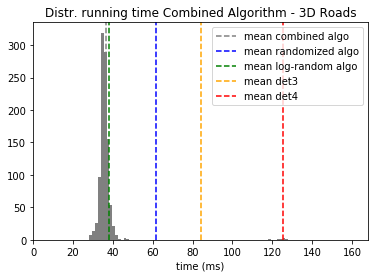

In [18]:
maximum = max(np.mean(time_rand),np.mean(time_log),np.mean(time_MT),np.mean(time_rand),np.mean(time_combined))*2

plt.hist(time_combined,bins=int(70),color='grey')
plt.axvline(np.mean(time_combined), linestyle='dashed', color="grey", label="mean combined algo")
plt.axvline(np.mean(time_rand), linestyle='dashed', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_log), linestyle='dashed', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), linestyle='dashed', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), linestyle='dashed', color="red", label="mean det4")
plt.xlim((0, maximum))

plt.legend()
plt.title('Distr. running time Combined Algorithm - 3D Roads')
plt.xlabel('time (ms)')

fig.tight_layout()
# plt.savefig('Distrib_running_time_3DRoads_combined.pdf')#, bbox_inches='tight')
plt.show()